# Update filename and headers

and add markdown cell explanations and in-code comments as needed

In [1]:
#impots all packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.utils import resample
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.metrics import confusion_matrix
from sklearn import tree
import xgboost as xgb
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.feature_selection import SelectKBest, chi2

In [2]:
#reads the csv 
df1 = pd.read_csv("C:/Users/student/Data Minning/featuresDefault.csv") 
df2 = pd.read_csv("C:/Users/student/Data Minning/BOW.csv")
print(df1.shape)
print(df2.shape)

(114, 199)
(114, 6251)


In [3]:
df1.head(1)

,id,phq9,NumTexts,help,office,dance,money,wedding,domestic_work,sleep,...,monster,ocean,giving,contentment,writing,rural,positive_emotion,musical,colors,text_abbreviations
0,e122,7,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
df2.head(2)

,id,phq9,NumTexts,a12179c,a26m,a26w,aa,aaaaaaand,aaaaw,aaapo,...,zeke,zero,zerodha,zillow,zindegi,zoey,zone,zones,zoology,zuri
0,e122,7,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,e1526,20,8,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Part 1: Classification with Feature Selection

In [5]:
#### THIS IS THE ONLY CODE YOU NEED TO CHANGE IN THIS PORTION OF THE LAB #########
#sets the split and number of features to be used
split = 20
numberOfFeatures = 10

In [23]:
#appends the featuresDefault dataset for the target features
data = df1[:]

data[data.columns[1]] = np.where(data[data.columns[1]] >= split, 1, 0)
features = data[data.columns[2:]]
target = data[data.columns[1]]
min_max_scaler = preprocessing.MinMaxScaler()                   #NEED TO SCALE BEFORE FEATURE SELECTION!
np_scaled = min_max_scaler.fit_transform(features)
featureSubset = pd.DataFrame(np_scaled)

for i in range(1, numberOfFeatures+1):
    KBest = SelectKBest(chi2, k=i).fit(featureSubset, target) 
    f = KBest.get_support(1)
newDF1 = featureSubset[featureSubset.columns[f]].assign(target = target)

columns = features.columns
names1 = list(columns[f])

names1.append("target")
newDF1.columns = names1
newDF1.head() #head only prints the top 5

,horror,suffering,ridicule,independence,dominant_heirarchical,youth,torment,politics,poor,timidity,target
0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0
1,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,1
2,0.0,0.000000,0.0,0.0,0.0,0.038175,0.0,0.0,0.000000,0.0,0
3,0.0,0.032787,0.0,0.0,0.0,0.000000,0.0,0.0,0.196721,0.0,0
4,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0


In [7]:
#appends the BOW dataset for the target features
data = df2[:]

data[data.columns[1]] = np.where(data[data.columns[1]] >= split, 1, 0)
features = data[data.columns[2:]]
target = data[data.columns[1]]
min_max_scaler = preprocessing.MinMaxScaler()                   #NEED TO SCALE BEFORE FEATURE SELECTION!
np_scaled = min_max_scaler.fit_transform(features)
featureSubset = pd.DataFrame(np_scaled)

for i in range(1, numberOfFeatures+1):
    KBest = SelectKBest(chi2, k=i).fit(featureSubset, target) 
    f = KBest.get_support(1)
newDF2 = featureSubset[featureSubset.columns[f]].assign(target = target)

columns = features.columns
names2 = list(columns[f])

names2.append("target")
newDF2.columns = names2
newDF2.head() #head only prints the top 5

,fur,ringer,roam,scan,snowed,taco,tazo,upiact,wallet,wit,target
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


For each dataframe, which two features are most important at split 5, split 15, split 20? Do these features make sense to you?
df1 = at 5 - government and law, at 15 - pet and leader, at 20 - indepence and torment
df2 = at 5 - yikes and zerodha, at 15 - meat and pet, at 20 - fur and wit 
Yes some of these do make sense when testing for aspects of depression seeing the messae of something like torment makes sense
Pick a split to proceed with. Increase the number of features to 10. 

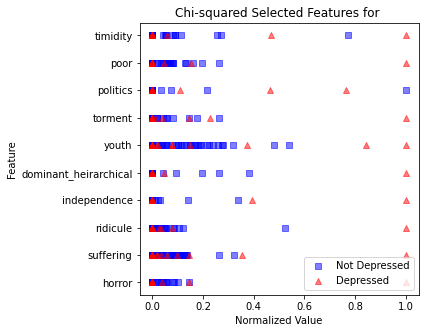

In [8]:
#sets the chi squared table for the featuresdefualt dataset
f1 = newDF1[newDF1.target == 1] #1 is depressed
f0 = newDF1[newDF1.target == 0] #0 is not depressed

array1 = []
for name in names1:
    namelist = []
    for i in range(0, f1.shape[0]):
        namelist.append(name)
    array1.append(namelist)
    
array0 = []
for name in names1:
    namelist = []
    for i in range(0, f0.shape[0]):
        namelist.append(name)
    array0.append(namelist)
    
plt.figure(figsize = (5,5))
for i in range(0, len(names1[:-1])):  #change these numbers to add or remove features
    plt.scatter(f0[names1[i]], array0[i], color = 'b', alpha = 0.5, label = "Not Depressed", marker = 's')

    plt.scatter(f1[names1[i]], array1[i], color = 'r', alpha = 0.5, label = "Depressed", marker = '^')
    #plt.scatter(array0[i], f0[names[i]], color = 'b', alpha = 0.5, label = "Not Depressed", marker = 's')
    if i == 0:
        plt.legend(loc='lower right')
#plt.xticks(names[:-1], rotation='vertical')
plt.ylabel("Feature")
plt.xlabel("Normalized Value")
plt.title("Chi-squared Selected Features for featuresDefault")
plt.show()
plt.close()

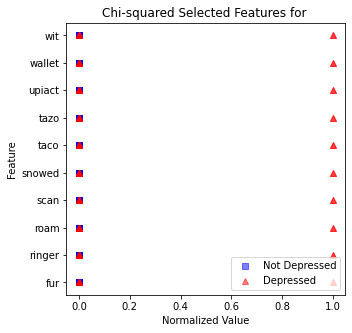

In [9]:
#sets the chi squared table for the BOW dataset
f1 = newDF2[newDF2.target == 1] #1 is depressed
f0 = newDF2[newDF2.target == 0] #0 is not depressed

array1 = []
for name in names2:
    namelist = []
    for i in range(0, f1.shape[0]):
        namelist.append(name)
    array1.append(namelist)
    
array0 = []
for name in names2:
    namelist = []
    for i in range(0, f0.shape[0]):
        namelist.append(name)
    array0.append(namelist)
    
plt.figure(figsize = (5,5))
for i in range(0, len(names2[:-1])):  #change these numbers to add or remove features
    plt.scatter(f0[names2[i]], array0[i], color = 'b', alpha = 0.5, label = "Not Depressed", marker = 's')

    plt.scatter(f1[names2[i]], array1[i], color = 'r', alpha = 0.5, label = "Depressed", marker = '^')
    #plt.scatter(array0[i], f0[names[i]], color = 'b', alpha = 0.5, label = "Not Depressed", marker = 's')
    if i == 0:
        plt.legend(loc='lower right')
#plt.xticks(names[:-1], rotation='vertical')
plt.ylabel("Feature")
plt.xlabel("Normalized Value")
plt.title("Chi-squared Selected Features for BOW")
plt.show()
plt.close()

Complete the plot titles in the above code. Compare the plots.

In addition, based on the plots:
* Which features do you visually think will be most useful for classification? (explain your answer)
The features that I believe will be visually most useful for the first plot are ridicule, suffering, and horror, because they have a very high population of uses showing that these would best indicate weather or not the respondents are depressed.
* Are these the same features as the two with the highest Chi-squared statistic?
No
* Which set of features do you think will be most useful for classification? (explain your answer)
I belive that the second set of features will be the most useful because they just show whether or not the repsondents are depressed based on whether they used the words or not, as well as the use of suffering, ridicule, and horror

In [10]:
#sets the split info for the datasets 
d10 = []
for i in range(0, df1.shape[0]):
    if int(df1.phq9[i]) >= split:
        d10.append(1)
    else:
        d10.append(0)
df1["phq9"] = d10
df2["phq9"] = d10

#checking values
print(sum(d10)/len(d10))
print(len(d10))

0.15789473684210525
114


## Machine learning code with comments added for you

In [11]:
#reading about python def https://www.w3schools.com/python/ref_keyword_def.asp
#sets the info for the calculation of the confusion matrix
def get_ba(x,y,z,q):
    #fit model and make predictions
    clf.fit(x, list(y))
    y_pred = clf.predict(z)

    #evaluate model - testing
    conf_mat = confusion_matrix(list(q), y_pred)
    TN = conf_mat[0][0]
    TP = conf_mat[1][1]
    FP = conf_mat[0][1]
    FN = conf_mat[1][0]
    sens = TP/(TP+FN)
    spec = TN/(TN+FP)
    ba = (sens + spec)/2
    return ba

In [18]:
#sets the info for the training and testing machine learning
modelTypelist = ["Ada", "XGB", "RF", "dt", "kNN", "LR"]
dfs = [df1, df2]
train_ba_depression = []
test_ba_depression = []
rlist = []
mlist = []
datalist = []

for d in range(0, len(dfs)):
    data = dfs[d]
    for modelType in modelTypelist: 
        for r in range(50, 75):
            datalist.append(d)
            rlist.append(r)
            mlist.append(modelType)

            #create train/test sets
            df_train, df_test = train_test_split(data, test_size=0.3, stratify=data[["phq9"]], random_state = r)

            #save target variables
            train_targets = df_train.loc[:,["phq9"]]
            test_targets = df_test.loc[:,["phq9"]]

            #drop non-features: id and targets
            trainContent = df_train.drop(columns = ["id", "phq9"])
            testContent = df_test.drop(columns = ["id", "phq9"])

            #normalize before pca
            min_max_scaler = preprocessing.MinMaxScaler()  
            np_scaled = min_max_scaler.fit_transform(trainContent)
            featureSubset = pd.DataFrame(np_scaled)
            np_scaled2 =  min_max_scaler.transform(testContent)
            testSubset = pd.DataFrame(np_scaled2)

            #feature selection
            chisetup = SelectKBest(chi2, k=numberOfFeatures)
            chisetup = chisetup.fit(featureSubset, train_targets)
            featureSubset2 = chisetup.transform(featureSubset)
            featureSubset2 = pd.DataFrame(featureSubset2)
            testSubsetChi = chisetup.transform(testSubset)
            testSubsetChi = pd.DataFrame(testSubsetChi)
            
            #principal component analysis
            #pca = PCA(n_components=numberOfFeatures)
            #pca = pca.fit(featureSubset)
            #X_pca = pca.transform(featureSubset)
            #pcaDF = pd.DataFrame(X_pca)
            #testSubset2 = pca.transform(testSubset)
            #pca_test = pd.DataFrame(testSubset2)

            #upsampling to balance classes
            train_targets = train_targets.reset_index(drop = True)
            DF_labels = pd.concat([featureSubset2,train_targets], axis = 1) #reattach labels

            phq0 = DF_labels[DF_labels.phq9 == 0]
            phq1 = DF_labels[DF_labels.phq9 == 1]
            if phq0.shape[0]>phq1.shape[0]:
                phq_upsampled = resample(phq1, n_samples=(phq0.shape[0]-phq1.shape[0]), random_state=50)
                phq_up = pd.concat([DF_labels, phq_upsampled])
            elif phq0.shape[0]<phq1.shape[0]:
                phq_upsampled = resample(phq0, n_samples=(phq1.shape[0]-phq0.shape[0]), random_state=50)
                phq_up = pd.concat([DF_labels, phq_upsampled])

            #remove upsampled labels
            phq_targets = phq_up.loc[:,["phq9"]]
            phq_features = phq_up.drop(columns = ["phq9"])

            #select modeltype
            if modelType == "Ada":
                clf = AdaBoostClassifier(random_state=r)
            elif modelType == "XGB":
                clf = xgb.XGBClassifier(max_depth=3, random_state=r)
            elif modelType == "RF":
                clf = RandomForestClassifier(max_depth=3, random_state=r)
            elif modelType == "dt":
                clf = tree.DecisionTreeClassifier(random_state = r, max_depth=3)
            elif modelType == "kNN":
                 clf = KNeighborsClassifier()
            elif modelType == "LR":
                clf = LogisticRegression(random_state=r)

            #train evaluate models
            ba = get_ba(phq_features, phq_targets["phq9"], testSubsetChi, test_targets["phq9"])
            test_ba_depression.append(ba)

            ba = get_ba(phq_features, phq_targets["phq9"], phq_features, phq_targets["phq9"])
            train_ba_depression.append(ba)
                
resultsDF = pd.DataFrame()
resultsDF["train_ba"] = train_ba_depression
resultsDF["test_ba"] = test_ba_depression
resultsDF["random"] = rlist
resultsDF["model"] = mlist
resultsDF["data"] = datalist
resultsDF.head()

ValueError: The least populated class in y has only 1 member, which is too few. The minimum number of groups for any class cannot be less than 2.

## Plotting

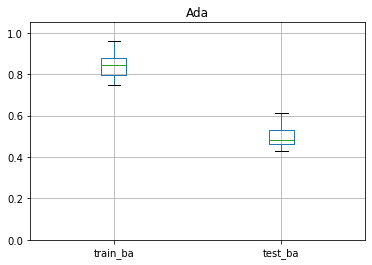

0.5 +- 0.05


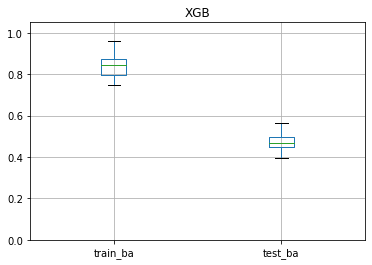

0.47 +- 0.04


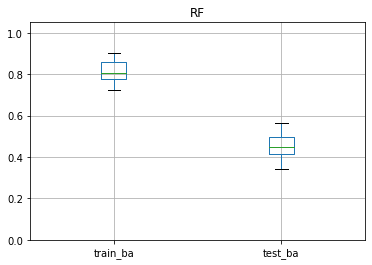

0.45 +- 0.05


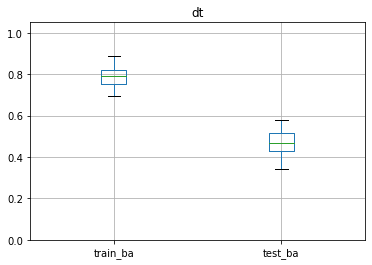

0.47 +- 0.06


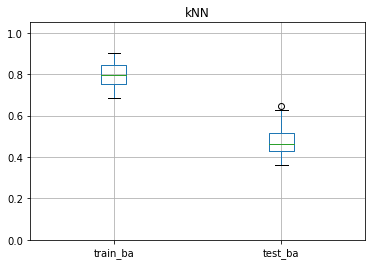

0.48 +- 0.08


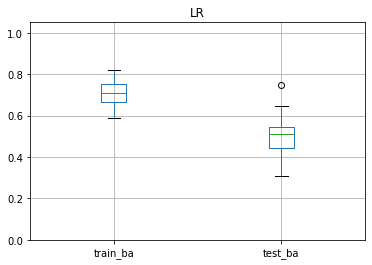

0.5 +- 0.1


In [22]:
#sets the plotting info for the models on dataset one
for modelType in modelTypelist: 
    tempDF = resultsDF[(resultsDF.model == modelType) & (resultsDF.data == 0)]
    tempDF.boxplot(['train_ba','test_ba'])
    plt.title(modelType)
    plt.ylim(0, 1.05)
    plt.show()
    plt.close()
    print(str(round(np.mean(tempDF["test_ba"]),2)) + " +- " + str(round(np.std(tempDF["test_ba"]),2)))

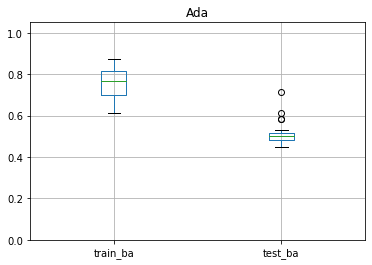

0.51 +- 0.06


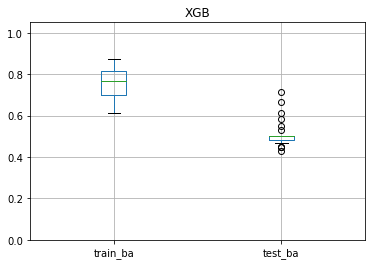

0.51 +- 0.07


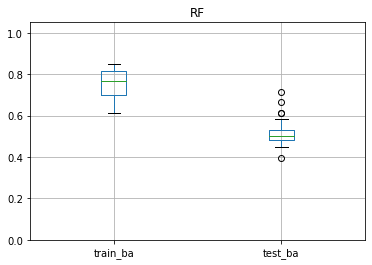

0.52 +- 0.07


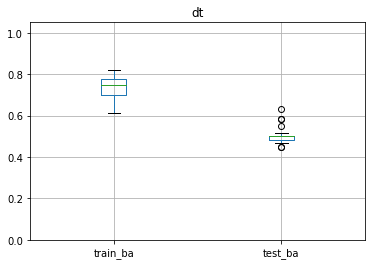

0.5 +- 0.04


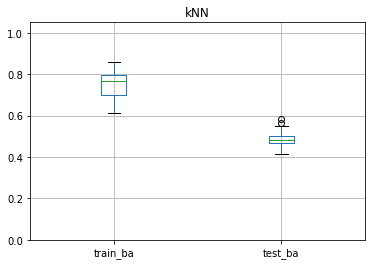

0.49 +- 0.04


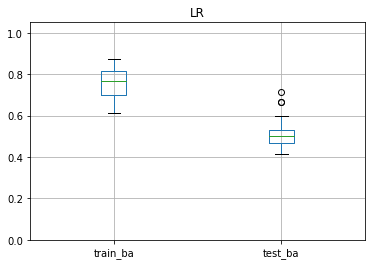

0.52 +- 0.07


In [14]:
#sets the plotting info for the models on dataset two
for modelType in modelTypelist: 
    tempDF = resultsDF[(resultsDF.model == modelType) & (resultsDF.data == 1)]
    tempDF.boxplot(['train_ba','test_ba'])
    plt.title(modelType)
    plt.ylim(0, 1.05)
    plt.show()
    plt.close()
    print(str(round(np.mean(tempDF["test_ba"]),2)) + " +- " + str(round(np.std(tempDF["test_ba"]),2)))

How do the two sets of boxplots differ?
The two sets of boxplots differe in their number of outliers.
Which modelTypes are being compared?
Ada, XGB, RF, dt, kNN, LR
Which dataset and modelType has the highest balanced accuracy? The lowest?
The dataset with the highest balance accuracy is the dataset 2 with model type LR and RF with a balanced accuracy of .52, the lowest is the dataset 1 with model type RF with a balanced accuracy of .45
Which dataset and modelType has the lowest standard deviation? The highest?
The dataset with the highest balance accuracy is the dataset 2 with model type LR and RF with a balanced accuracy of .52, the lowest is the dataset 1 with model type RF with a balanced accuracy of .45
Based on the results, which feature set worked best to classify texts with chi-squared feature selection and the selected split?
Dataset 2 as most of the models being tested in dataste 1 had a very high range of standard deviations.

# Part 2: Regression Models



In [15]:
#reloads the the two datasets 
df1 = pd.read_csv("C:/Users/student/Data Minning/featuresDefault.csv") 
df2 = pd.read_csv("C:/Users/student/Data Minning/BOW.csv")
print(df1.shape)
print(df2.shape)

(114, 199)
(114, 6251)


Why did I reload the data?
Because if we were to use the data that was being useded it would be utilizing the training and testing data, and it wouldn't have all of the data because we were using a split

In [24]:
#sets the decision tree regression for each of the data sets 
folds = 5

dec = DecisionTreeRegressor(max_depth=3)
# reg = LinearRegression()
print(cross_val_score(dec, df1[df1.columns[2:]],  df1[df1.columns[1]], cv=folds, scoring = 'neg_mean_absolute_error'))
#print(cross_val_score(reg, df1[df1.columns[2:]],  df1[df1.columns[1]], cv=folds, scoring = 'neg_mean_absolute_error'))
print(cross_val_score(dec, df2[df2.columns[2:]],  df2[df2.columns[1]], cv=folds, scoring = 'neg_mean_absolute_error'))
#print(cross_val_score(reg, df2[df2.columns[2:]],  df2[df2.columns[1]], cv=folds, scoring = 'neg_mean_absolute_error'))

[-5.3048419  -6.92173913 -6.25063378 -5.68034128 -5.76332288]
[-4.35401873 -7.64524457 -7.55606749 -5.22890026 -4.60678211]


Repeat the above block of code for df2. Then answer the following questions:

* For folds = 3, what is the average MAE? (hint, the negative MAE is printed for each fold)
the average MAE for df1 is 6.780593, and for df2 is 5.7559479
* Which of the four feature set and modelType combinations has the highest average MAE? lowest MAE?

* Which of the four featre set and modelType combinations has the most difference of MAE between folds? Least difference? Note, this is an approximation of standard deviation.

Increase the number of folds. What do you observe about the average MAE and difference between MAE?
The average starts to decrease